In [ ]:
#import packages
from string import ascii_letters
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime, timedelta
import statsmodels.api as sm
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded_files = files.upload()

Saving cleaned (1).csv to cleaned (1).csv


In [ ]:
import io
data = io.BytesIO(uploaded_files['cleaned (1).csv'])

In [ ]:
df = pd.read_csv(data)

# Data Cleaning and Transformation

In [ ]:
#Columns kept from data
df = df[['INSTNM', 'STABBR', 'PREDDEG', 'HIGHDEG', 'ST_FIPS', 'REGION', 'LOCALE2', 'ADM_RATE', 'ADM_RATE_ALL', 'SAT_AVG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'TUITFTE', 'PFTFTUG1_EF', 'FEMALE', 'FIRST_GEN', 'LNFAMINC', 'POVERTY_RATE', 'MN_EARN_WNE_P6', 'MD_EARN_WNE_P6', 'MN_EARN_WNE_P8', 'MD_EARN_WNE_P8', 'PCIP01', 'PCIP03' , 'PCIP04', 'PCIP05',  'PCIP09','PCIP10',
'PCIP11', 'PCIP12','PCIP13','PCIP14','PCIP15','PCIP16','PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29','PCIP30','PCIP31','PCIP38','PCIP39','PCIP40','PCIP41','PCIP42','PCIP43','PCIP44','PCIP45','PCIP46','PCIP47','PCIP48','PCIP49','PCIP50','PCIP51',
'PCIP52','PCIP54' ]]

In [ ]:
#Dropped these columns - either only contained null values or irrelevant features
df.drop(['LOCALE2', 'LNFAMINC', 'POVERTY_RATE','STABBR', 'MD_EARN_WNE_P8', 'MD_EARN_WNE_P6', 'TUITIONFEE_PROG', 'INSTNM'], axis=1, inplace=True)

In [ ]:
#Treat PrivacySupressed as null
df = df.replace("PrivacySuppressed", np.nan)

In [ ]:
#Only keep features with more than 4000 non-null
df_over_4000 = df.drop(['ADM_RATE', 'ADM_RATE_ALL', 'SAT_AVG','COSTT4_P'], axis=1)

In [ ]:
#drop any rows containing null
temp_df = df_over_4000.dropna(how='any',axis=0) 

In [ ]:
#Convert columns to numeric
temp_df[['FEMALE', 'FIRST_GEN', 'MN_EARN_WNE_P6', 'MN_EARN_WNE_P8']] = temp_df[['FEMALE', 'FIRST_GEN', 'MN_EARN_WNE_P6', 'MN_EARN_WNE_P8']].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#Dictionaries
predominant_undergraduate_degree_awarded = {0: 'NC', 1: 'PCDG', 2: 'PADG', 3: 'PBDG', 4: 'EGDG'}
highest_degree_awarded = {0: 'NDG', 1: 'certificate', 2: 'associate', 3: 'bachelor', 4: 'graduate'}
state_FIPS = {1: 'alabama', 2: 'alaska', 4: 'arizona', 5: 'arkansas', 6: 'california', 8: 'colorado', 9: 'connecticut', 10: 'delaware', 11: 'district_of_columbia', 12: 'florida', 13: 'georgia',
              15: 'hawaii', 16: 'idaho', 17: 'illinois', 18: 'indiana', 19: 'iowa', 20: 'kansas', 21: 'kentucky', 22: 'louisiana', 23: 'maine', 24: 'maryland', 25: 'massachusetts', 26: 'michigan',
              27: 'minnesota', 28: 'mississippi', 29: 'missouri', 30: 'montana', 31: 'nebraska', 32: 'nevada', 33: 'new_hampshire', 34: 'new_jersey', 35: 'new_mexico', 36: 'new_york', 37: ' north_carolina',
              38: 'north_dakota', 39: 'ohio', 40: 'oklahoma', 41: 'oregon', 42: 'pennsylvania', 44: 'rhode_island', 45: 'south_carolina', 46: 'south_dakota', 47: 'tennessee', 48: 'texas', 49: 'utah',
              50: 'vermont', 51: 'virginia', 53: 'washington', 54: 'west_virginia', 55: 'wisconsin', 56: 'wyoming', 60: 'american_samoa', 64: 'federated states of micronesia', 66: 'guam',
              69: 'northern_mariana_islands', 70: 'palau', 72: 'puerto_rico', 78: 'virgin_islands'}
region = {0: 'service_schools', 1: 'new_england', 2: 'mid_east', 3: 'great_lakes', 4: 'plains', 5: 'southeast', 6: 'southwest', 7: 'rockey_mountains', 8: 'far_west', 9: 'outlying_areas'}

In [ ]:
#Replace numeric values with categories
temp_df.replace({'PREDDEG': predominant_undergraduate_degree_awarded, 'HIGHDEG': highest_degree_awarded, 'ST_FIPS': state_FIPS, 'REGION': region}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# One-hot Encoding

In [ ]:
# One hot encoding
dominant_degree_one_hot = pd.get_dummies(temp_df['PREDDEG'])
highest_degree_one_hot = pd.get_dummies(temp_df['HIGHDEG'])
state_one_hot = pd.get_dummies(temp_df['ST_FIPS'])
region_one_hot = pd.get_dummies(temp_df['REGION'])
test_df = temp_df.join(dominant_degree_one_hot)
test_df1 = test_df.join(highest_degree_one_hot)
test_df2 = test_df1.join(state_one_hot)
test_df3 = test_df2.join(region_one_hot)
# temp = test_df2.drop(['PREDDEG', 'HIGHDEG', 'ST_FIPS'], axis=1)
temp = test_df3.drop(['PREDDEG', 'HIGHDEG', 'ST_FIPS', 'REGION'], axis=1)

In [ ]:
#Make all columns float
temp.iloc[:, -1878:] = temp.iloc[:, -1878:].astype(float)

# Visualizing the Income Data

Text(0, 0.5, 'Number of ex-students')

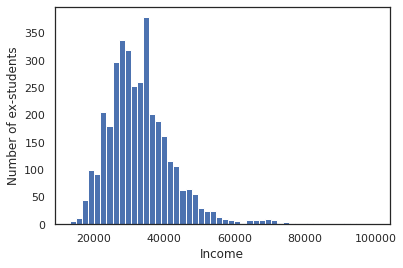

In [ ]:
# Histogram of income
plt.hist(temp.MN_EARN_WNE_P6, bins=50)

#label
plt.xlabel('Income')
plt.ylabel('Number of ex-students')

As one can see, there is a visable left-skew, which we will correct by squaring later.

# Removing Outliers

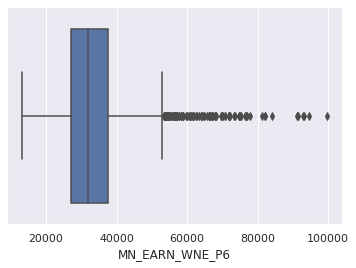

In [ ]:
#Visualize outliers
sns.boxplot(x=temp['MN_EARN_WNE_P6'])

In [ ]:
Q1 = temp.MN_EARN_WNE_P6.quantile(0.25)
Q3 = temp.MN_EARN_WNE_P6.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10500.0


In [ ]:
# removed rows that are either:
#   - less than 1.5*IQR under Q1 OR 
#   - more than 1.5*IQR above Q3
temp = temp[ ~ ( (temp.MN_EARN_WNE_P6 < (Q1 - 1.5 * IQR)) | (temp.MN_EARN_WNE_P6 > (Q3 + 1.5 * IQR) ))]

### Test 1: All features


In [ ]:
# defining the dependent and independent variables
Xtrain = temp[['UGDS_WHITE' , 'UGDS_BLACK' , 'UGDS_HISP' , 'UGDS_ASIAN' , 'UGDS_NHPI' , 'COSTT4_A' , 'TUITIONFEE_IN','TUITIONFEE_OUT' ,'TUITFTE','PFTFTUG1_EF', 'FEMALE' , 'FIRST_GEN','PCIP01' , 'PCIP03' , 'PCIP04' , 'PCIP05' , 'PCIP09' ,'PCIP10' , 'PCIP11' , 'PCIP12', 'PCIP13' , 'PCIP14' , 'PCIP15','PCIP16' , 'PCIP19' , 'PCIP22' , 'PCIP24' , 'PCIP25', 'PCIP26', 'PCIP27' , 'PCIP29','PCIP30','PCIP31' , 'PCIP38' , 'PCIP39' , 'PCIP40', 'PCIP41' , 'PCIP42' , 'PCIP43','PCIP44' ,'PCIP45' ,'PCIP46' ,'PCIP47','PCIP48' ,'PCIP49', 'PCIP50' ,'PCIP51' ,'PCIP52' ,'PCIP54',
               'PADG','PBDG' ,'PCDG', 'NDG' ,'associate', 'bachelor' ,'certificate'
             ,'graduate','alabama' ,'alaska' ,'american_samoa' ,'arizona' ,'arkansas' ,'california' ,'colorado' ,
               'connecticut' ,'delaware', 'district_of_columbia' ,'florida' ,'georgia' ,'guam'
               ,'hawaii' ,'idaho' ,'illinois' ,'indiana', 'iowa', 'kansas', 'kentucky',
               'louisiana' ,'maine' ,'maryland' ,'massachusetts' ,'michigan', 'minnesota' ,'mississippi' ,'missouri' ,'montana' ,
               'nebraska' ,'nevada', 'new_hampshire' ,'new_jersey','new_mexico', 'new_york', 'north_dakota', 'northern_mariana_islands',
               'ohio' , 'oklahoma' ,'oregon' ,'pennsylvania' ,'puerto_rico', 'rhode_island' ,
               'south_carolina' ,'south_dakota', 'tennessee' ,'texas' ,'utah','vermont','virgin_islands' ,'virginia', 'washington' ,'west_virginia','new_england','mid_east','great_lakes' , 'plains' , 
                'southeast' , 'southwest', 'rockey_mountains', 'far_west','outlying_areas']]
ytrain = temp[['MN_EARN_WNE_P6']]
  
X = sm.add_constant(Xtrain) # adding a constant

model = sm.OLS(ytrain, Xtrain).fit()

print_model = model.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         MN_EARN_WNE_P6   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     75.60
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:31:03   Log-Likelihood:                -34014.
No. Observations:                3499   AIC:                         6.825e+04
Df Residuals:                    3387   BIC:                         6.894e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
UGDS_WHITE              

In [ ]:
#Table as csv
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
df_vis.to_csv('test1.csv')

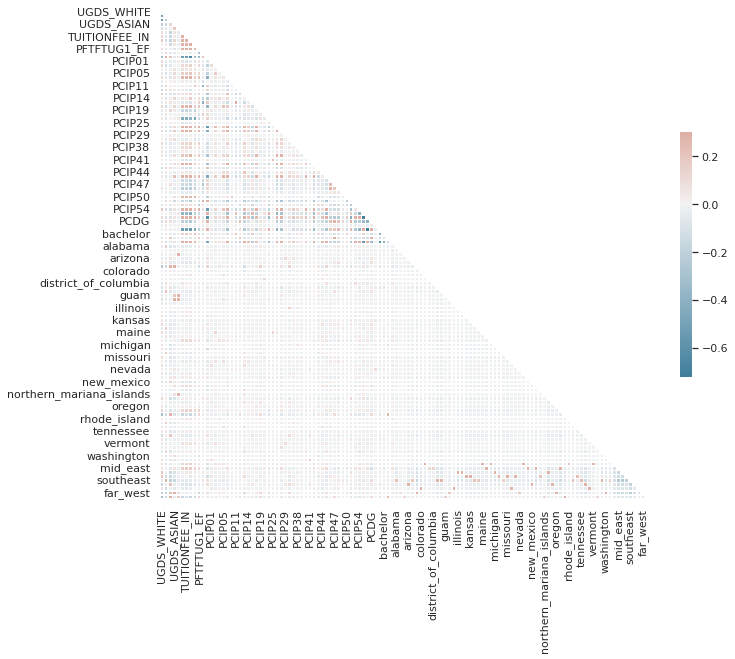

In [ ]:
# heat map
sns.set_theme(style="white")
corr = Xtrain.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### *Variable Significance Visualization*

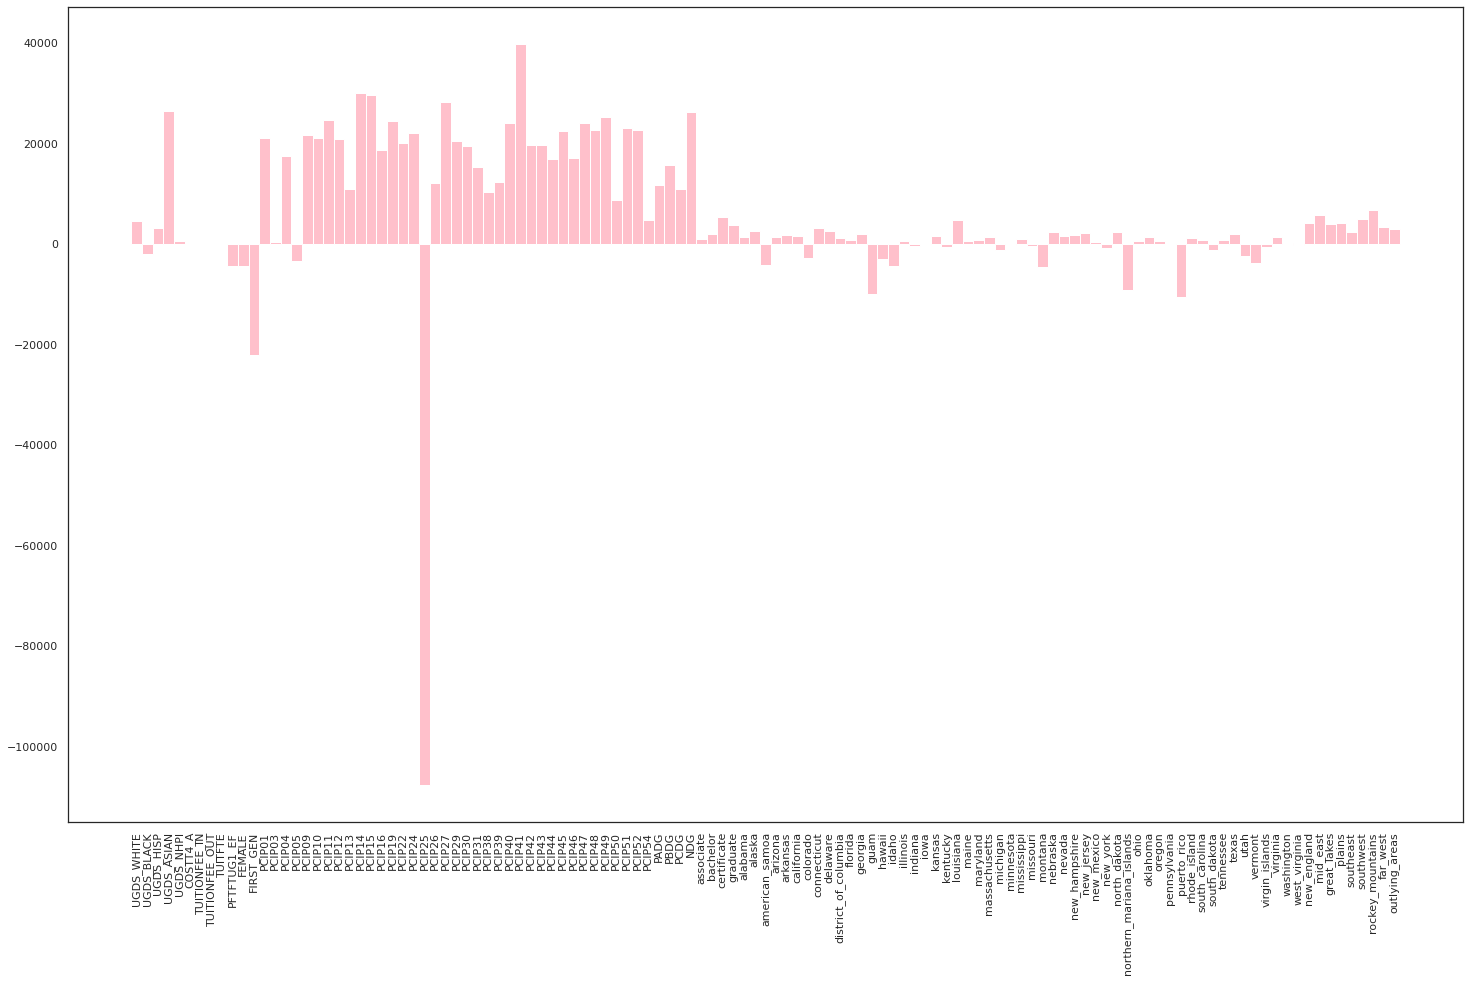

In [ ]:
from matplotlib import pyplot
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df_vis['coef']

lables = ['UGDS_WHITE' , 'UGDS_BLACK' , 'UGDS_HISP' , 'UGDS_ASIAN' , 'UGDS_NHPI' , 'COSTT4_A' , 'TUITIONFEE_IN','TUITIONFEE_OUT' ,'TUITFTE','PFTFTUG1_EF', 'FEMALE' , 'FIRST_GEN','PCIP01' , 'PCIP03' , 'PCIP04' , 'PCIP05' , 'PCIP09' ,'PCIP10' , 'PCIP11' , 'PCIP12', 'PCIP13' , 'PCIP14' , 'PCIP15','PCIP16' , 'PCIP19' , 'PCIP22' , 'PCIP24' , 'PCIP25', 'PCIP26', 'PCIP27' , 'PCIP29','PCIP30','PCIP31' , 'PCIP38' , 'PCIP39' , 'PCIP40', 'PCIP41' , 'PCIP42' , 'PCIP43','PCIP44' ,'PCIP45' ,'PCIP46' ,'PCIP47','PCIP48' ,'PCIP49', 'PCIP50' ,'PCIP51' ,'PCIP52' ,'PCIP54','PADG','PBDG' ,'PCDG', 'NDG' ,'associate', 'bachelor' ,'certificate'
             ,'graduate','alabama' ,'alaska' ,'american_samoa' ,'arizona' ,'arkansas' ,'california' ,'colorado' ,
               'connecticut' ,'delaware', 'district_of_columbia' ,'florida' ,'georgia' ,'guam'
               ,'hawaii' ,'idaho' ,'illinois' ,'indiana', 'iowa', 'kansas', 'kentucky',
               'louisiana' ,'maine' ,'maryland' ,'massachusetts' ,'michigan', 'minnesota' ,'mississippi' ,'missouri' ,'montana' ,
               'nebraska' ,'nevada', 'new_hampshire' ,'new_jersey','new_mexico', 'new_york', 'north_dakota', 'northern_mariana_islands',
               'ohio' , 'oklahoma' ,'oregon' ,'pennsylvania' ,'puerto_rico', 'rhode_island' ,
               'south_carolina' ,'south_dakota', 'tennessee' ,'texas' ,'utah','vermont','virgin_islands' ,'virginia', 'washington' ,'west_virginia','new_england','mid_east','great_lakes' , 'plains' , 
                'southeast' , 'southwest', 'rockey_mountains', 'far_west','outlying_areas']
pyplot.figure(figsize = (25, 15))
pyplot.xticks([x for x in range(len(a))], lables, rotation='vertical')
pyplot.bar([x for x in range(len(a))], a, color= 'pink', width=1, align='center', tick_label =lables )
pyplot.show()

Training Validation

In [ ]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain,np.sqrt(ytrain))

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2624, 119) (875, 119) (2624, 1) (875, 1)


Prediction


In [ ]:
# Create a LinearRegression Object
lreg = LinearRegression()

# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#intercept
lreg.intercept_ 

array([173.29576053])

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 122.59
Fit a model X_train, and calculate MSE with X_test and Y_test: 138.07


# Test 2: Using top 15 features with highest positive coefficients

In [ ]:
df_vis.sort_values(by = 'coef', ascending = False).head(15)

,coef,std err,t,P>|t|,[0.025,0.975]
PCIP41,39790.0,8765.049,4.539,0.000,22600.000,57000.0
PCIP14,30000.0,5831.617,5.145,0.000,18600.000,41400.0
PCIP15,29680.0,5740.555,5.171,0.000,18400.000,40900.0
PCIP27,28140.0,13600.000,2.066,0.039,1436.177,54800.0
UGDS_ASIAN,26330.0,2104.697,12.511,0.000,22200.000,30500.0
NDG,26170.0,3526.074,7.422,0.000,19300.000,33100.0
PCIP49,25250.0,5905.938,4.275,0.000,13700.000,36800.0
PCIP11,24530.0,5691.380,4.310,0.000,13400.000,35700.0
PCIP19,24390.0,6157.827,3.961,0.000,12300.000,36500.0
PCIP40,24060.0,6675.889,3.604,0.000,11000.000,37100.0


In [ ]:
# defining the dependent and independent variables
lreg = LinearRegression()
Xtrain = temp[['PCIP41', 'PCIP14','PCIP15','PCIP27' , 'NDG' , 
                'UGDS_ASIAN' , 'PCIP49' , 'PCIP11' , 'PCIP40' , 'PCIP19' , 'PCIP47' , 'PCIP51' , 'PCIP48' , 'PCIP52','PCIP45' ]]
ytrain = temp['MN_EARN_WNE_P6']
X = sm.add_constant(Xtrain) # adding a constant

# building the model and fitting the data
model = sm.OLS(ytrain, Xtrain).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:         MN_EARN_WNE_P6   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              1515.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:31:09   Log-Likelihood:                         -37839.
No. Observations:                3499   AIC:                                  7.571e+04
Df Residuals:                    3484   BIC:                                  7.580e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


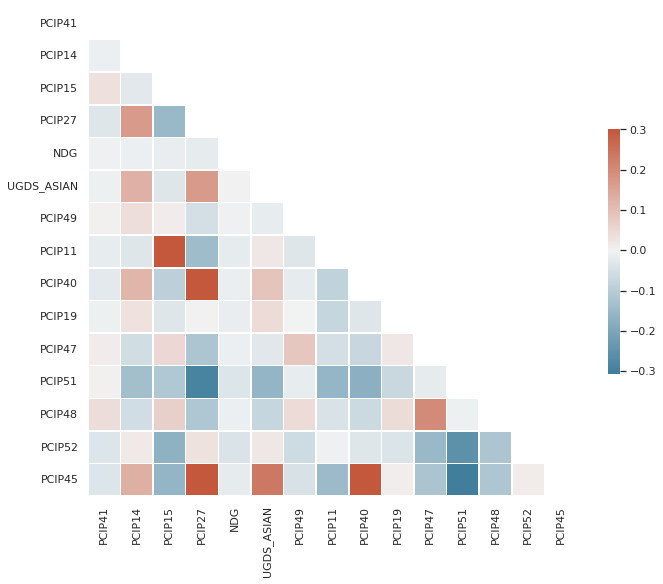

In [ ]:
# heat map
sns.set_theme(style="white")
corr = Xtrain.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
df_vis.to_csv('test_2.csv')

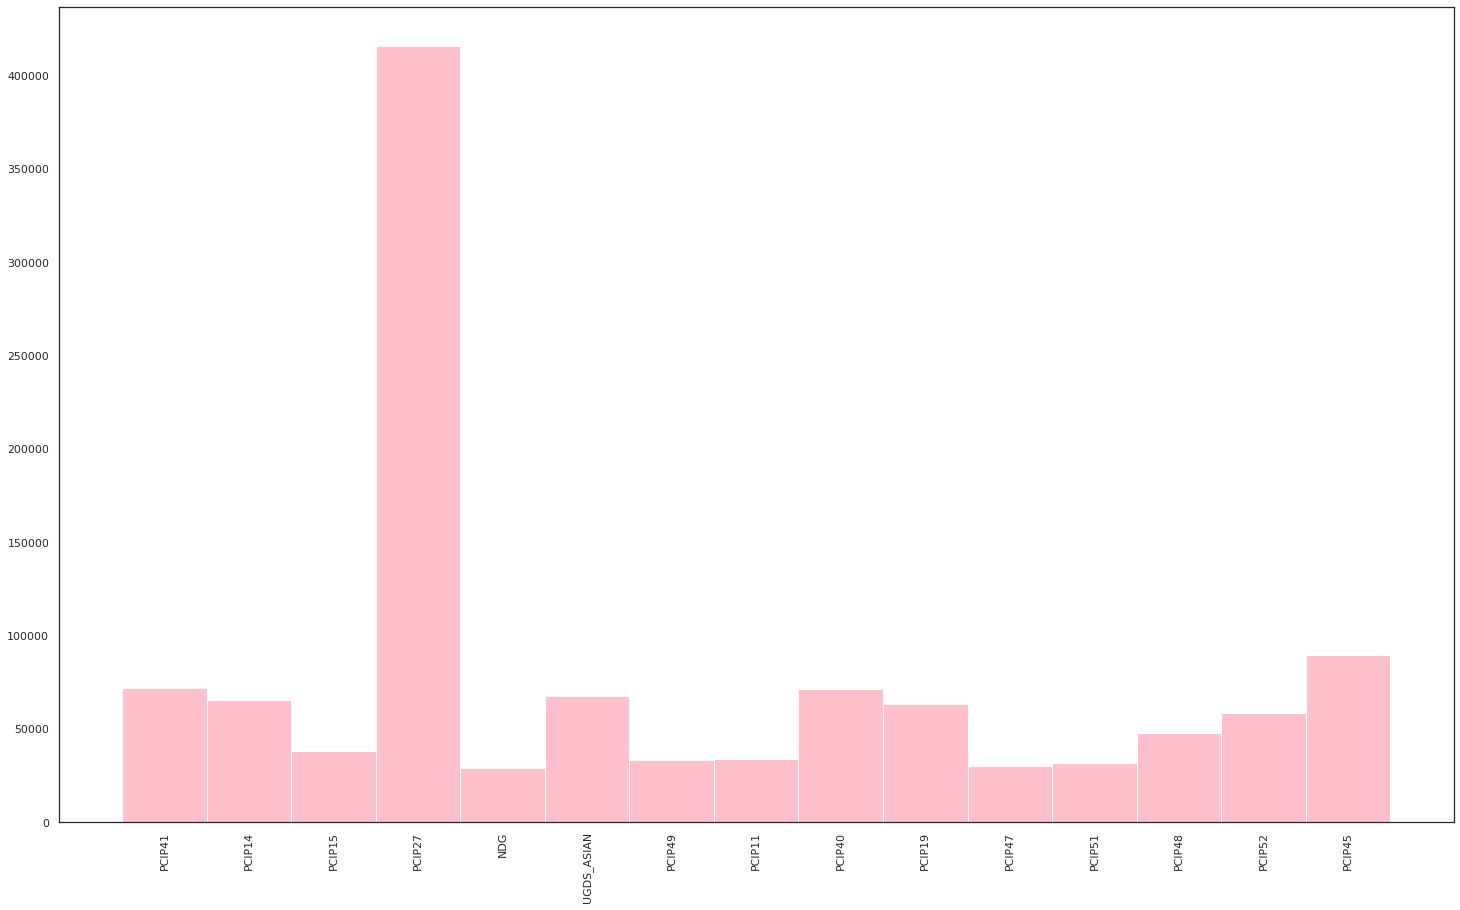

In [ ]:
from matplotlib import pyplot
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df_vis['coef']

lables = ['PCIP41', 'PCIP14','PCIP15','PCIP27' , 'NDG' , 
                'UGDS_ASIAN' , 'PCIP49' , 'PCIP11' , 'PCIP40' , 'PCIP19' , 'PCIP47' , 'PCIP51' , 'PCIP48' , 'PCIP52','PCIP45']
pyplot.figure(figsize = (25, 15))
pyplot.xticks([x for x in range(len(a))], lables, rotation='vertical')
pyplot.bar([x for x in range(len(a))], a, color= 'pink', width=1, align='center', tick_label =lables )
pyplot.show()

In [ ]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain,np.sqrt(ytrain))

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2624, 15) (875, 15) (2624,) (875,)


Prediction


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#intercept
lreg.intercept_ 

168.99298083203087

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 313.49
Fit a model X_train, and calculate MSE with X_test and Y_test: 328.04


# Test 3: Using all features except demographic information

Not using : (UGDS_WHITE, UGDS_BLACK, UGDS_HISP, UGDS_ASIAN, UGDS_AIAN, UGDS_NHPI, PFTFTUG1_EF, FEMALE, FIRST_GEN)

In [ ]:
# defining the dependent and independent variables
lreg = LinearRegression()
Xtrain = temp[['COSTT4_A' , 'TUITIONFEE_IN','TUITIONFEE_OUT' ,'TUITFTE','PCIP01' , 'PCIP03' , 'PCIP04' , 'PCIP05' , 'PCIP09' ,'PCIP10' , 'PCIP11' , 'PCIP12', 'PCIP13' , 'PCIP14' , 'PCIP15','PCIP16' , 'PCIP19' , 'PCIP22' , 'PCIP24' , 'PCIP25', 'PCIP26', 'PCIP27' , 'PCIP29','PCIP30','PCIP31' , 'PCIP38' , 'PCIP39' , 'PCIP40', 'PCIP41' , 'PCIP42' , 'PCIP43','PCIP44' ,'PCIP45' ,'PCIP46' ,'PCIP47','PCIP48' ,'PCIP49', 'PCIP50' ,'PCIP51' ,'PCIP52' ,'PCIP54',
               'PADG','PBDG' ,'PCDG', 'NDG' ,'associate', 'bachelor' ,'certificate'
             ,'graduate','alabama' ,'alaska' ,'american_samoa' ,'arizona' ,'arkansas' ,'california' ,'colorado' ,
               'connecticut' ,'delaware', 'district_of_columbia' ,'florida' ,'georgia' ,'guam'
               ,'hawaii' ,'idaho' ,'illinois' ,'indiana', 'iowa', 'kansas', 'kentucky',
               'louisiana' ,'maine' ,'maryland' ,'massachusetts' ,'michigan', 'minnesota' ,'mississippi' ,'missouri' ,'montana' ,
               'nebraska' ,'nevada', 'new_hampshire' ,'new_jersey','new_mexico', 'new_york', 'north_dakota', 'northern_mariana_islands',
               'ohio' , 'oklahoma' ,'oregon' ,'pennsylvania' ,'puerto_rico', 'rhode_island' ,
               'south_carolina' ,'south_dakota', 'tennessee' ,'texas' ,'utah','vermont','virgin_islands' ,'virginia', 'washington' ,'west_virginia' ]]
ytrain = temp['MN_EARN_WNE_P6']
X = sm.add_constant(Xtrain) # adding a constant

# building the model and fitting the data
model = sm.OLS(ytrain, Xtrain).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         MN_EARN_WNE_P6   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     55.60
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:31:10   Log-Likelihood:                -34499.
No. Observations:                3499   AIC:                         6.920e+04
Df Residuals:                    3398   BIC:                         6.982e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
COSTT4_A                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


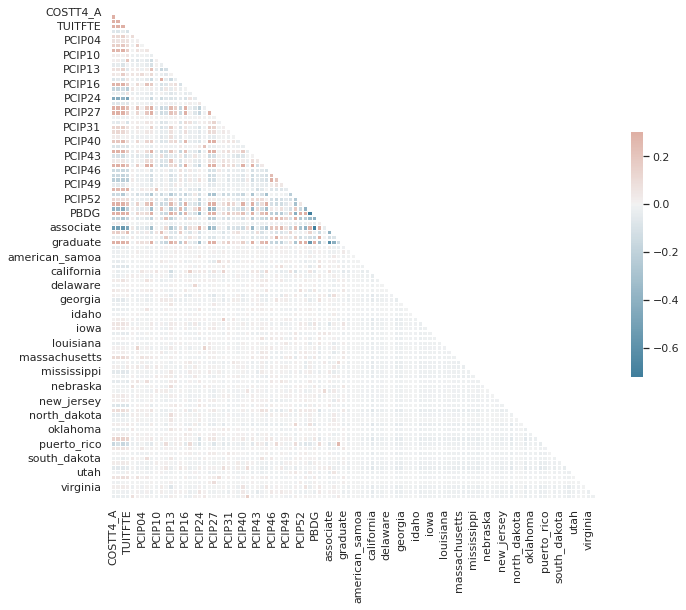

In [ ]:
# heat map
sns.set_theme(style="white")
corr = Xtrain.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

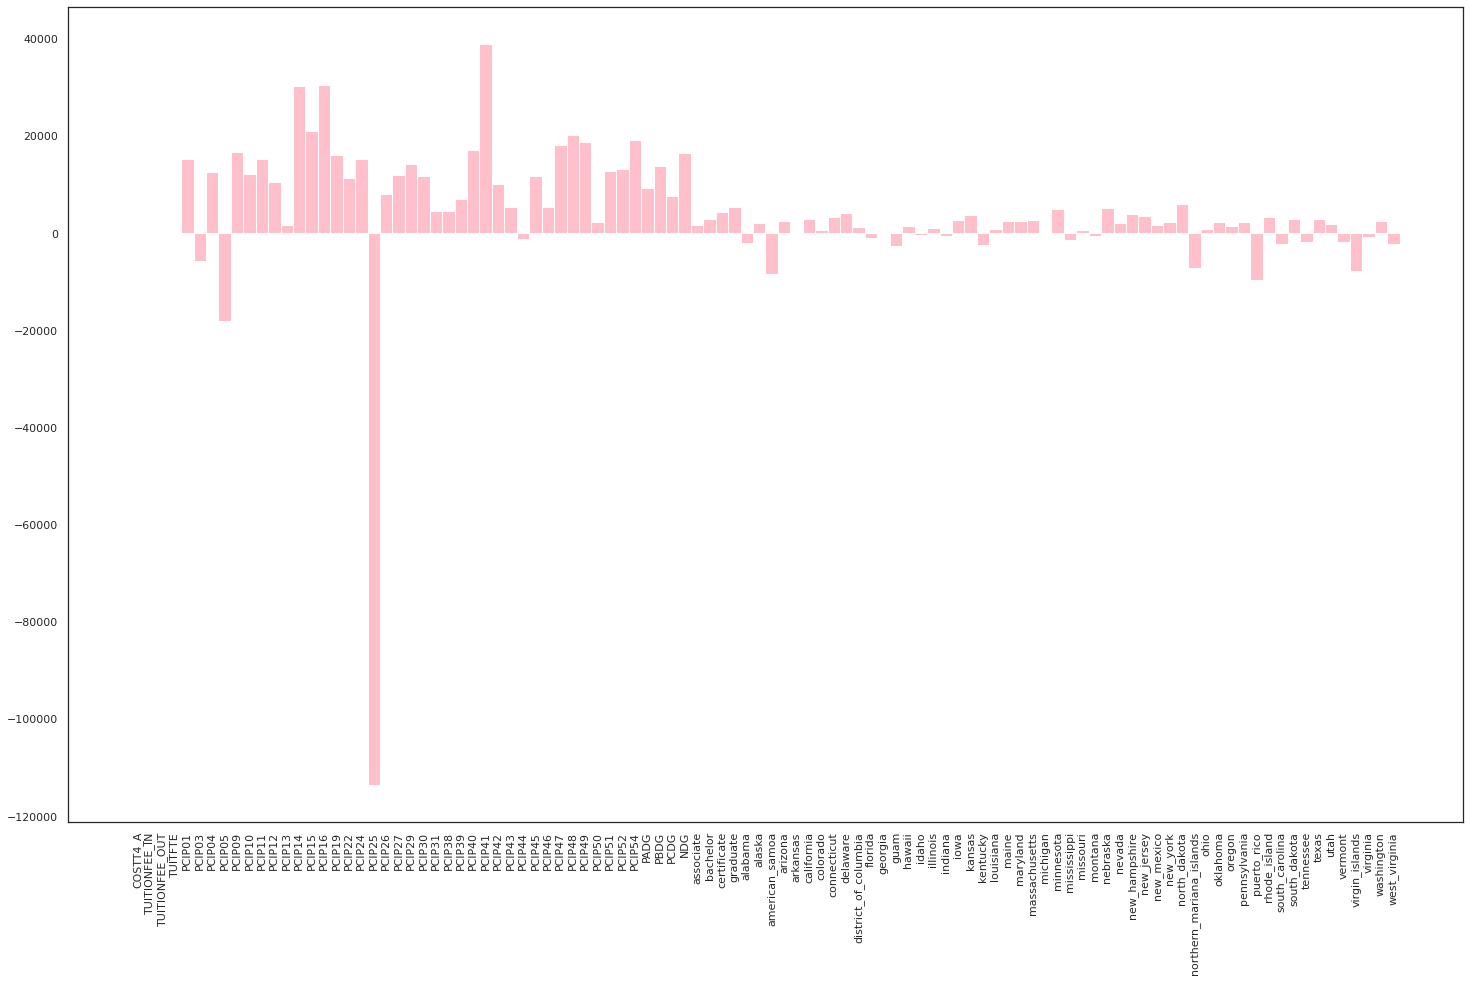

In [ ]:
from matplotlib import pyplot
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df_vis['coef']

lables = ['COSTT4_A' , 'TUITIONFEE_IN','TUITIONFEE_OUT' ,'TUITFTE','PCIP01' , 'PCIP03' , 'PCIP04' , 'PCIP05' , 'PCIP09' ,'PCIP10' , 'PCIP11' , 'PCIP12', 'PCIP13' , 'PCIP14' , 'PCIP15','PCIP16' , 'PCIP19' , 'PCIP22' , 'PCIP24' , 'PCIP25', 'PCIP26', 'PCIP27' , 'PCIP29','PCIP30','PCIP31' , 'PCIP38' , 'PCIP39' , 'PCIP40', 'PCIP41' , 'PCIP42' , 'PCIP43','PCIP44' ,'PCIP45' ,'PCIP46' ,'PCIP47','PCIP48' ,'PCIP49', 'PCIP50' ,'PCIP51' ,'PCIP52' ,'PCIP54',
               'PADG','PBDG' ,'PCDG', 'NDG' ,'associate', 'bachelor' ,'certificate'
             ,'graduate','alabama' ,'alaska' ,'american_samoa' ,'arizona' ,'arkansas' ,'california' ,'colorado' ,
               'connecticut' ,'delaware', 'district_of_columbia' ,'florida' ,'georgia' ,'guam'
               ,'hawaii' ,'idaho' ,'illinois' ,'indiana', 'iowa', 'kansas', 'kentucky',
               'louisiana' ,'maine' ,'maryland' ,'massachusetts' ,'michigan', 'minnesota' ,'mississippi' ,'missouri' ,'montana' ,
               'nebraska' ,'nevada', 'new_hampshire' ,'new_jersey','new_mexico', 'new_york', 'north_dakota', 'northern_mariana_islands',
               'ohio' , 'oklahoma' ,'oregon' ,'pennsylvania' ,'puerto_rico', 'rhode_island' ,
               'south_carolina' ,'south_dakota', 'tennessee' ,'texas' ,'utah','vermont','virgin_islands' ,'virginia', 'washington' ,'west_virginia' ]
pyplot.figure(figsize = (25, 15))
pyplot.xticks([x for x in range(len(a))], lables, rotation='vertical')
pyplot.bar([x for x in range(len(a))], a, color= 'pink', width=1, align='center', tick_label =lables )
pyplot.show()

In [ ]:
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
df_vis.to_csv('test3.csv')

In [ ]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain,np.sqrt(ytrain))

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2624, 102) (875, 102) (2624,) (875,)


Prediction


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#intercept
lreg.intercept_ 

136.90165071008855

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 165.48
Fit a model X_train, and calculate MSE with X_test and Y_test: 177.29


# Test 4: Using only state features

In [ ]:
# defining the dependent and independent variables
lreg = LinearRegression()
Xtrain = temp[['alabama' ,'alaska' ,'american_samoa' ,'arizona' ,'arkansas' ,'california' ,'colorado' ,
               'connecticut' ,'delaware', 'district_of_columbia' ,'florida' ,'georgia' ,'guam',
               'hawaii' ,'idaho' ,'illinois' ,'indiana', 'iowa', 'kansas', 'kentucky',
               'louisiana' ,'maine' ,'maryland' ,'massachusetts' ,'michigan', 'minnesota' ,'mississippi' ,'missouri' ,'montana' ,
               'nebraska' ,'nevada', 'new_hampshire' ,'new_jersey','new_mexico', 'new_york', 'north_dakota', 'northern_mariana_islands',
               'ohio' , 'oklahoma' ,'oregon' ,'pennsylvania' ,'puerto_rico', 'rhode_island' ,
               'south_carolina' ,'south_dakota', 'tennessee' ,'texas' ,'utah','vermont','virgin_islands' ,'virginia', 'washington' ,'west_virginia' ]]
ytrain = temp['MN_EARN_WNE_P6']
X = sm.add_constant(Xtrain) # adding a constant

# building the model and fitting the data
model = sm.OLS(ytrain, Xtrain).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:         MN_EARN_WNE_P6   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              625.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:31:15   Log-Likelihood:                         -37235.
No. Observations:                3499   AIC:                                  7.458e+04
Df Residuals:                    3446   BIC:                                  7.490e+04
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


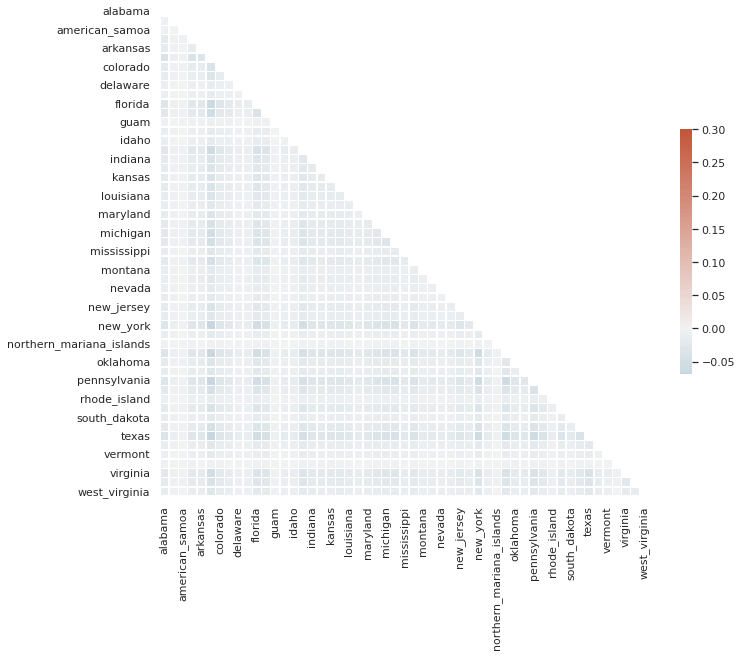

In [ ]:
# heat map
sns.set_theme(style="white")
corr = Xtrain.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

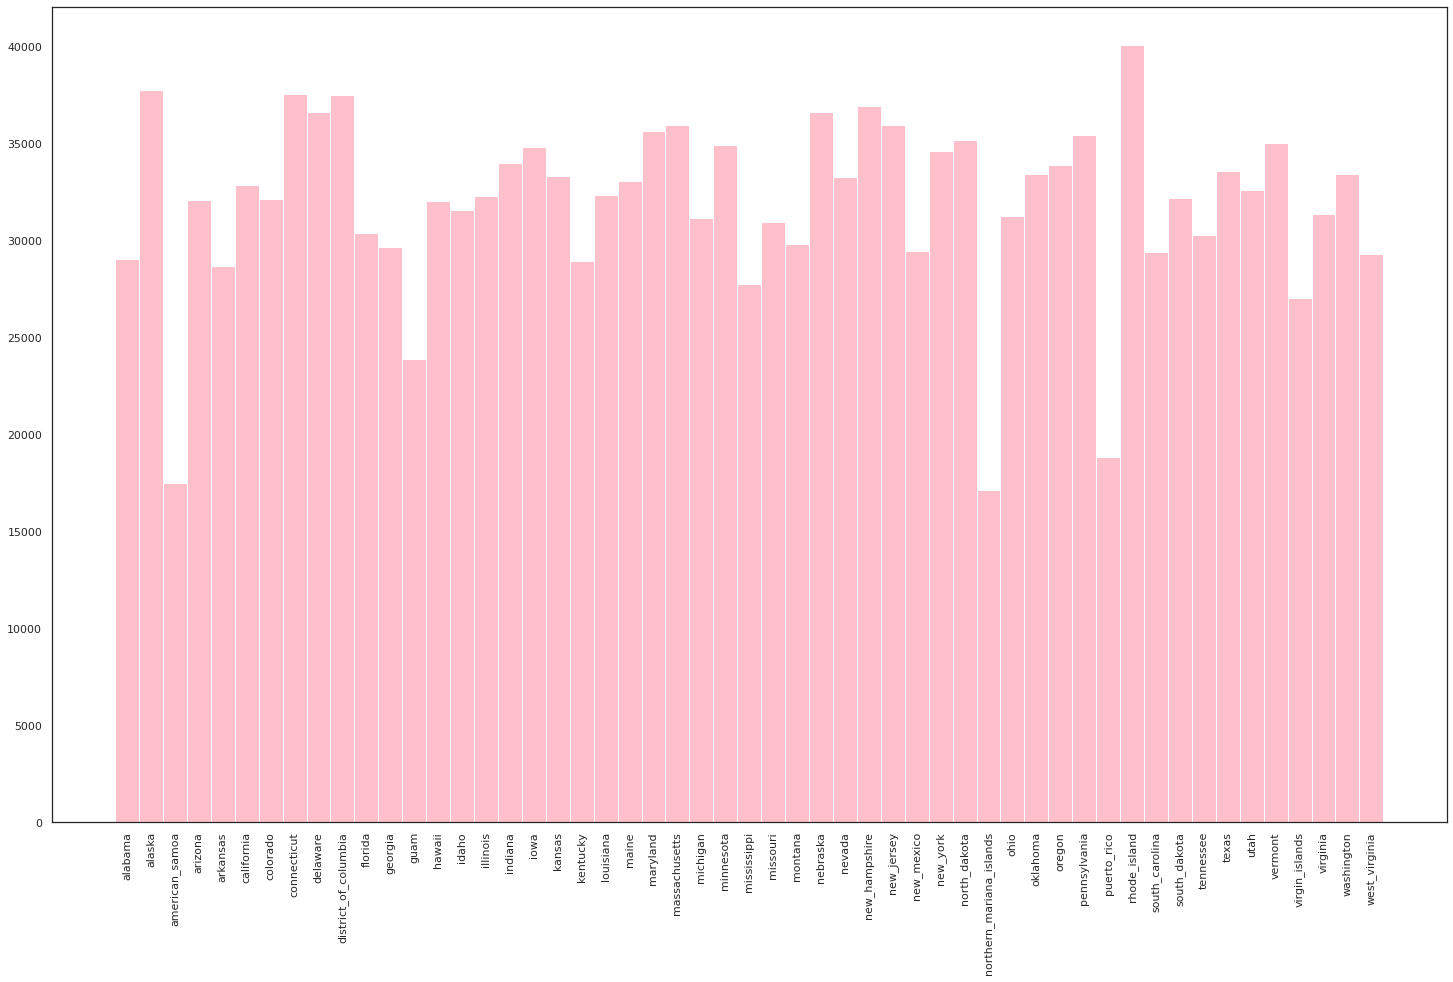

In [ ]:
from matplotlib import pyplot
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df_vis['coef']

lables = ['alabama' ,'alaska' ,'american_samoa' ,'arizona' ,'arkansas' ,'california' ,'colorado' ,
               'connecticut' ,'delaware', 'district_of_columbia' ,'florida' ,'georgia' ,'guam',
               'hawaii' ,'idaho' ,'illinois' ,'indiana', 'iowa', 'kansas', 'kentucky',
               'louisiana' ,'maine' ,'maryland' ,'massachusetts' ,'michigan', 'minnesota' ,'mississippi' ,'missouri' ,'montana' ,
               'nebraska' ,'nevada', 'new_hampshire' ,'new_jersey','new_mexico', 'new_york', 'north_dakota', 'northern_mariana_islands',
               'ohio' , 'oklahoma' ,'oregon' ,'pennsylvania' ,'puerto_rico', 'rhode_island' ,
               'south_carolina' ,'south_dakota', 'tennessee' ,'texas' ,'utah','vermont','virgin_islands' ,'virginia', 'washington' ,'west_virginia' ]
pyplot.figure(figsize = (25, 15))
pyplot.xticks([x for x in range(len(a))], lables, rotation='vertical')
pyplot.bar([x for x in range(len(a))], a, color= 'pink', width=1, align='center', tick_label =lables )
pyplot.show()

In [ ]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain,np.sqrt(ytrain))

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2624, 53) (875, 53) (2624,) (875,)


Prediction


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#intercept
lreg.intercept_ 

172.91684056447258

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 351.23
Fit a model X_train, and calculate MSE with X_test and Y_test: 397.37


# Test 5: With Top Positive and Negative Features from Test 1


In [ ]:
# defining the dependent and independent variables
lreg = LinearRegression()
Xtrain = temp[['PCIP41', 'PCIP14','PCIP15','PCIP27' , 'NDG' , 
                'UGDS_ASIAN' , 'PCIP25', 'FEMALE', 'pennsylvania','PCIP49' , 'PCIP11' , 'PCIP40' , 'PCIP19' , 'PCIP47' , 'PCIP51' , 'PCIP48' , 'PCIP52','PCIP45' ]]

ytrain = temp['MN_EARN_WNE_P6']
X = sm.add_constant(Xtrain) # adding a constant

# building the model and fitting the data
model = sm.OLS(ytrain, Xtrain).fit()

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:         MN_EARN_WNE_P6   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              3146.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:17:20   Log-Likelihood:                         -36385.
No. Observations:                3499   AIC:                                  7.281e+04
Df Residuals:                    3481   BIC:                                  7.292e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


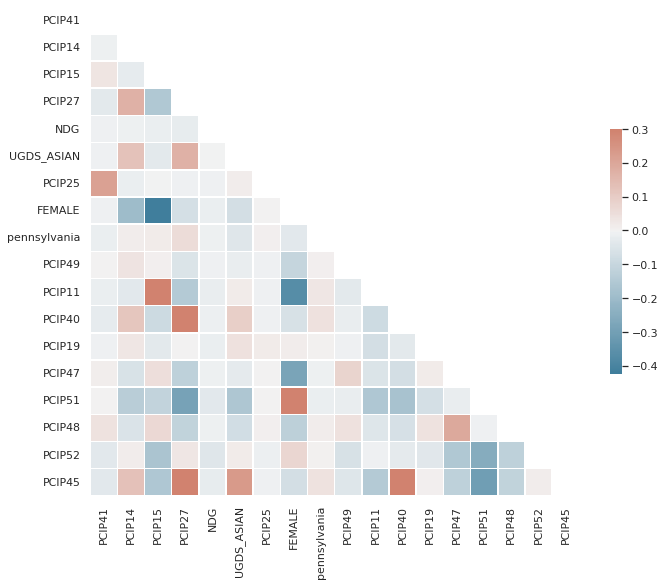

In [ ]:
# heat map
sns.set_theme(style="white")
corr = Xtrain.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

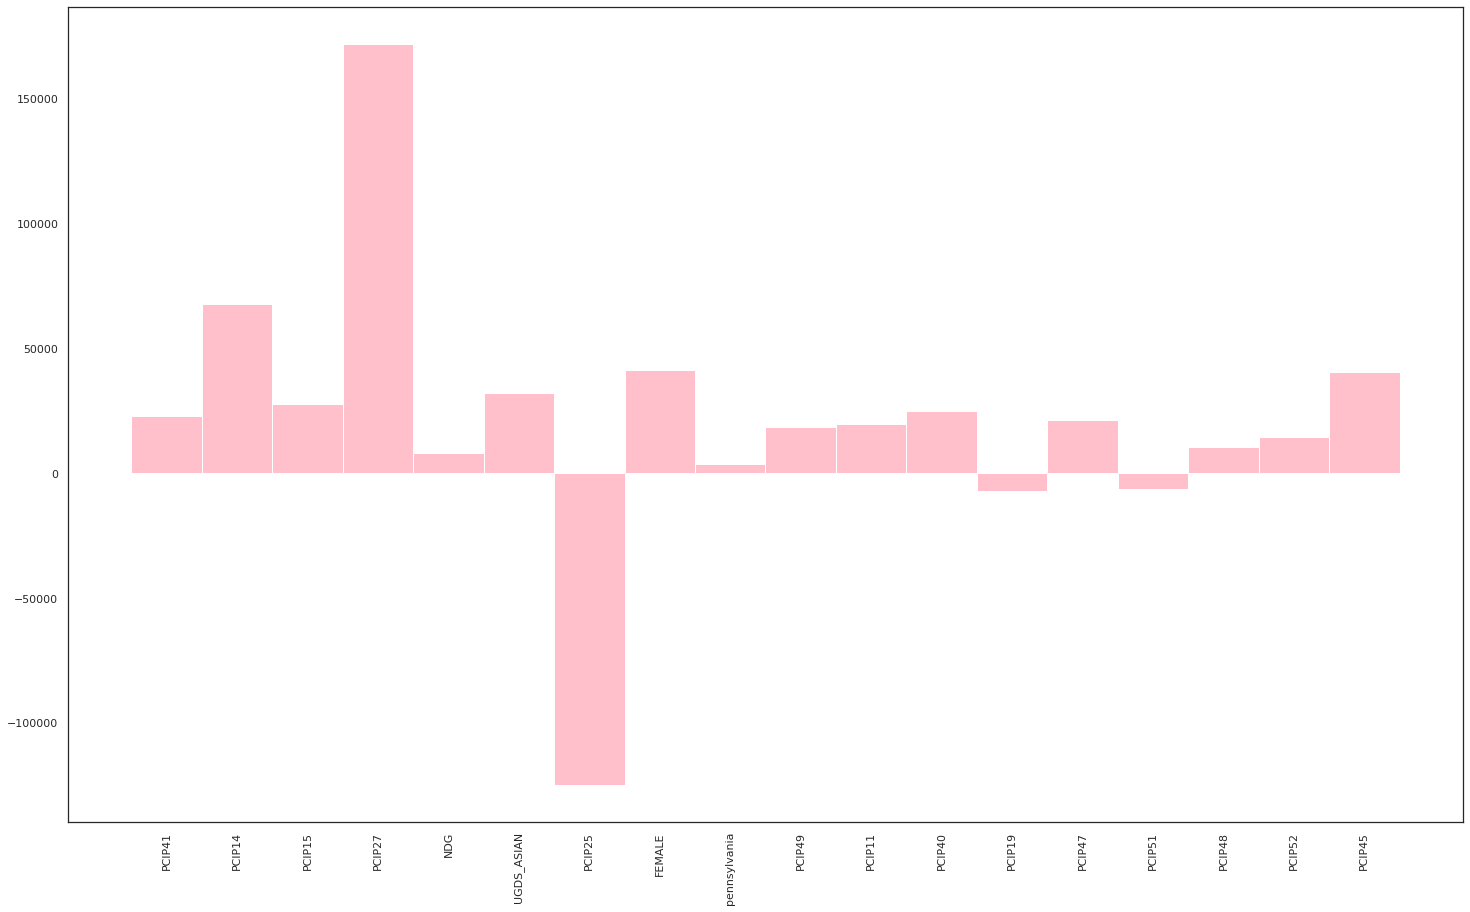

In [ ]:
from matplotlib import pyplot
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df_vis['coef']

lables = ['PCIP41', 'PCIP14','PCIP15','PCIP27' , 'NDG' , 
                'UGDS_ASIAN' , 'PCIP25', 'FEMALE', 'pennsylvania','PCIP49' , 'PCIP11' , 'PCIP40' , 'PCIP19' , 'PCIP47' , 'PCIP51' , 'PCIP48' , 'PCIP52','PCIP45' ]
pyplot.figure(figsize = (25, 15))
pyplot.xticks([x for x in range(len(a))], lables, rotation='vertical')
pyplot.bar([x for x in range(len(a))], a, color= 'pink', width=1, align='center', tick_label =lables )
pyplot.show()

In [ ]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain,np.sqrt(ytrain))

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2624, 18) (875, 18) (2624,) (875,)


Prediction

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lreg.intercept_ 

181.29756762356052

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 306.92
Fit a model X_train, and calculate MSE with X_test and Y_test: 327.81


# Test 6: Region only



In [ ]:
# defining the dependent and independent variables
lreg = LinearRegression()
Xtrain = temp[[ 'new_england','mid_east','great_lakes' , 'plains' , 
                'southeast' , 'southwest', 'rockey_mountains', 'far_west','outlying_areas' ]]

ytrain = temp['MN_EARN_WNE_P6']
X = sm.add_constant(Xtrain) # adding a constant

# building the model and fitting the data
model = sm.OLS(ytrain, Xtrain).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         MN_EARN_WNE_P6   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     76.61
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          7.36e-117
Time:                        17:45:58   Log-Likelihood:                -35911.
No. Observations:                3499   AIC:                         7.184e+04
Df Residuals:                    3490   BIC:                         7.190e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
new_england        3.61e+04    513.335  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


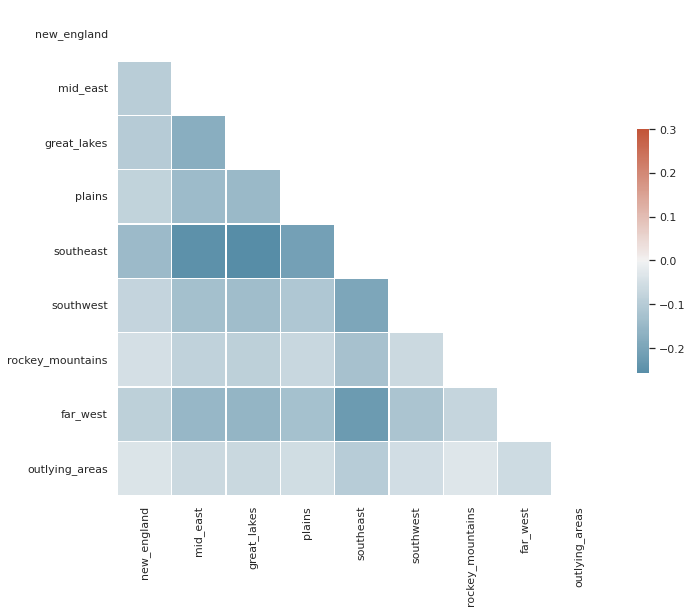

In [ ]:
# heat map
sns.set_theme(style="white")
corr = Xtrain.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

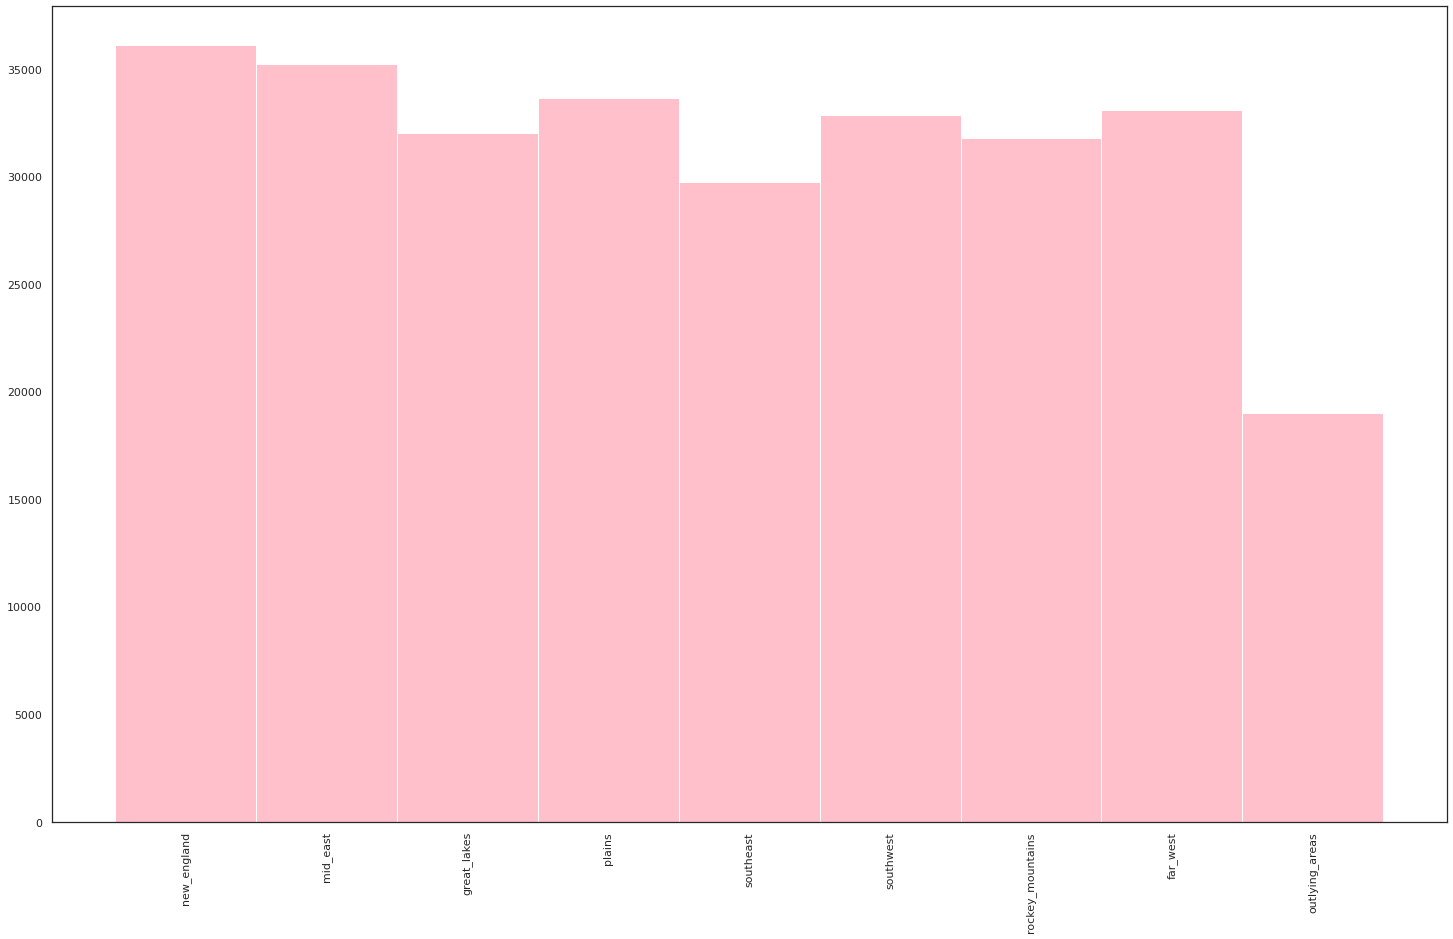

In [ ]:
from matplotlib import pyplot
df_vis = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
a=df_vis['coef']

lables = ['new_england','mid_east','great_lakes' , 'plains' , 
                'southeast' , 'southwest', 'rockey_mountains', 'far_west','outlying_areas']
pyplot.figure(figsize = (25, 15))
pyplot.xticks([x for x in range(len(a))], lables, rotation='vertical')
pyplot.bar([x for x in range(len(a))], a, color= 'pink', width=1, align='center', tick_label =lables )
pyplot.show()

In [ ]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain,np.sqrt(ytrain))

In [ ]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2624, 9) (875, 9) (2624,) (875,)


Prediction

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [ ]:
lreg.intercept_

-596154599578220.1

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 375.19
Fit a model X_train, and calculate MSE with X_test and Y_test: 349.80
